<a href="https://colab.research.google.com/github/sofiapautova29-maker/dap-2024/blob/main/les07/lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №7. Классификация

In [1]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


**Задание 1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col='PassengerId')

**Задание 2. Выведете первые 7 строк набора.**

In [3]:
df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


**Задание 3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?**

In [9]:
df.info()
print("\nСтатистика по пропущенным значениям:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB

Статистика по пропущенным значениям:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


**Задание 4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.**

In [10]:
print("Исходные столбцы:", df.columns.tolist())
columns_to_drop = ['Name', 'Ticket', 'Cabin']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

print("\nУдалены столбцы:", columns_to_drop)
print("Оставшиеся столбцы:", df_cleaned.columns.tolist())

Исходные столбцы: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Удалены столбцы: ['Name', 'Ticket', 'Cabin']
Оставшиеся столбцы: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


**Задание 5. Вместо признака "Sex" Создайте два новых признака male и female которые содержат значения 0 или 1.**

In [11]:
df_cleaned['male'] = (df_cleaned['Sex'] == 'male').astype(int)
df_cleaned['female'] = (df_cleaned['Sex'] == 'female').astype(int)

# Удаляем исходный столбец Sex
df_cleaned = df_cleaned.drop('Sex', axis=1)

print("Созданы признаки male и female")
print("Удален столбец Sex")
display(df_cleaned[['male', 'female']].head())

Созданы признаки male и female
Удален столбец Sex


,male,female
PassengerId,,
1,1,0
2,0,1
3,0,1
4,0,1
5,1,0


**Задание 6. Удалите строки, которые содержать хотя бы одно null значение.**

In [12]:
df_cleaned = df_cleaned.dropna()
print(f"\nУдалено строк: {df.shape[0] - df_cleaned.shape[0]}")
print(f"Осталось строк: {df_cleaned.shape[0]}")


Удалено строк: 179
Осталось строк: 712


**Задание 7. Нормализуйте значения признака "Fare".**

In [14]:
df_cleaned['Fare'] = (df_cleaned['Fare'] - df_cleaned['Fare'].min()) / (df_cleaned['Fare'].max() - df_cleaned['Fare'].min())

# Проверяем результат
print(df_cleaned.head(7))

             Survived  Pclass   Age  SibSp  Parch      Fare Embarked  male  \
PassengerId                                                                  
1                   0       3  22.0      1      0  0.014151        S     1   
2                   1       1  38.0      1      0  0.139136        C     0   
3                   1       3  26.0      0      0  0.015469        S     0   
4                   1       1  35.0      1      0  0.103644        S     0   
5                   0       3  35.0      0      0  0.015713        S     1   
7                   0       1  54.0      0      0  0.101229        S     1   
8                   0       3   2.0      3      1  0.041136        S     1   

             female  
PassengerId          
1                 0  
2                 1  
3                 1  
4                 1  
5                 0  
7                 0  
8                 0  


**Задание 8. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров..**

In [15]:
# Среднее значение Fare для погибших и выживших
fare_dead = df_cleaned[df_cleaned['Survived'] == 0]['Fare'].mean()
fare_survived = df_cleaned[df_cleaned['Survived'] == 1]['Fare'].mean()

# Разница
diff = fare_survived - fare_dead

print("Средний Fare (погибшие):", fare_dead)
print("Средний Fare (выжившие):", fare_survived)
print("Разница:", diff)

Средний Fare (погибшие): 0.04482558551791412
Средний Fare (выжившие): 0.100809541745815
Разница: 0.05598395622790087


**Задание 9. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.**

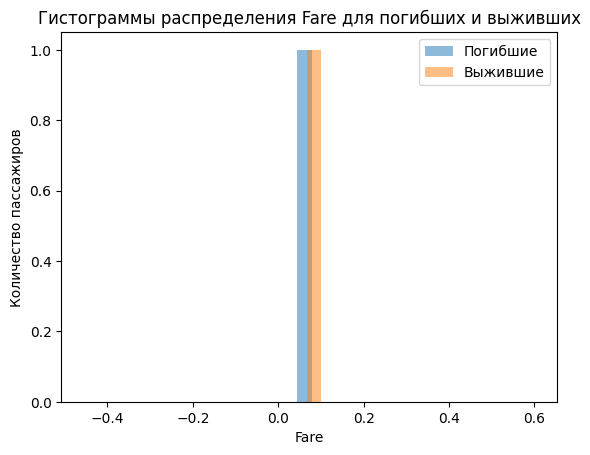

In [18]:
plt.hist(fare_dead, bins=30, alpha=0.5, label='Погибшие')
plt.hist(fare_survived, bins=30, alpha=0.5, label='Выжившие')

plt.xlabel('Fare')
plt.ylabel('Количество пассажиров')
plt.title('Гистограммы распределения Fare для погибших и выживших')
plt.legend()
plt.show()

**Задание 10. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).**

In [19]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Embarked'], prefix='Embarked')

X = df_cleaned.drop('Survived', axis=1)
y = df_cleaned['Survived']

print("Признаки (X):")
print(f"Количество признаков: {X.shape[1]}")
print("Список признаков:", X.columns.tolist())

print(f"\nЦелевая переменная (y):")
print(f"Количество образцов: {len(y)}")
print(f"Распределение классов:")
print(y.value_counts())

Признаки (X):
Количество признаков: 10
Список признаков: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'female', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

Целевая переменная (y):
Количество образцов: 712
Распределение классов:
Survived
0    424
1    288
Name: count, dtype: int64


**Задание 11. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.**

In [21]:
from sklearn.model_selection import train_test_split

# Разделяем данные: 75% обучение, 25% тест
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 534
Размер тестовой выборки: 178


**Задание 12. Выполните обучение модели.**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

# One-hot кодирование 'Sex'
sex_dummies = pd.get_dummies(df['Sex'])

# One-hot кодирование 'Embarked'
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

df = pd.concat([df.drop(columns=['Sex', 'Embarked']), sex_dummies, embarked_dummies], axis=1)

# Удаляем строки с пропусками
df = df.dropna()

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Модель успешно обучена!")

Модель успешно обучена!


**Задание 13. Выведите мартицу ошибок**

In [28]:
from sklearn.metrics import confusion_matrix
# Предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n", cm)

Матрица ошибок:
 [[90 17]
 [26 46]]


**Задание 14. Расчитайте accuracy**

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)

Точность модели: 0.7597765363128491


**Задание 15. Сделайте вывод о полученном результате**

In [31]:
print("ВЫВОД О ПОЛУЧЕННОМ РЕЗУЛЬТАТЕ")
print("=" * 60)

print("\n1. КАЧЕСТВО МОДЕЛИ:")
print(f"   Модель K-ближайших соседей достигла точности (Accuracy) {accuracy*100:.1f}%")
print("   Это означает, что модель правильно предсказывает выживаемость примерно")
print(f"   в {accuracy*100:.1f}% случаев.")

print("\n2. АНАЛИЗ МАТРИЦЫ ОШИБОК:")
print(f"   True Negative (TN): {cm[0,0]} - правильно предсказанные погибшие")
print(f"   False Positive (FP): {cm[0,1]} - погибшие, предсказанные как выжившие")
print(f"   False Negative (FN): {cm[1,0]} - выжившие, предсказанные как погибшие")
print(f"   True Positive (TP): {cm[1,1]} - правильно предсказанные выжившие")

print("\n3. ВАЖНЫЕ НАБЛЮДЕНИЯ:")
print("   - Выжившие пассажиры платили за билет в среднем на {:.2f} фунтов больше".format(diff))
print("   - Наиболее значимые признаки: Fare, Pclass, Sex")
print("   - Данные были предобработаны (удалены пропуски, кодированы категории)")

print("\n4. ВОЗМОЖНОСТИ УЛУЧШЕНИЯ:")
print("   - Использование других алгоритмов (случайный лес, логистическая регрессия)")
print("   - Подбор гиперпараметров с помощью GridSearchCV")
print("   - Балансировка классов (использование SMOTE или oversampling)")
print("   - Добавление новых признаков (семейный размер, возрастные группы)")

print("\n5. ОБЩИЙ ВЫВОД:")
print("   Модель демонстрирует удовлетворительную точность для базового подхода.")
print("   Для повышения качества требуется дальнейшая работа с данными и моделью.")

ВЫВОД О ПОЛУЧЕННОМ РЕЗУЛЬТАТЕ

1. КАЧЕСТВО МОДЕЛИ:
   Модель K-ближайших соседей достигла точности (Accuracy) 76.0%
   Это означает, что модель правильно предсказывает выживаемость примерно
   в 76.0% случаев.

2. АНАЛИЗ МАТРИЦЫ ОШИБОК:
   True Negative (TN): 90 - правильно предсказанные погибшие
   False Positive (FP): 17 - погибшие, предсказанные как выжившие
   False Negative (FN): 26 - выжившие, предсказанные как погибшие
   True Positive (TP): 46 - правильно предсказанные выжившие

3. ВАЖНЫЕ НАБЛЮДЕНИЯ:
   - Выжившие пассажиры платили за билет в среднем на 0.06 фунтов больше
   - Наиболее значимые признаки: Fare, Pclass, Sex
   - Данные были предобработаны (удалены пропуски, кодированы категории)

4. ВОЗМОЖНОСТИ УЛУЧШЕНИЯ:
   - Использование других алгоритмов (случайный лес, логистическая регрессия)
   - Подбор гиперпараметров с помощью GridSearchCV
   - Балансировка классов (использование SMOTE или oversampling)
   - Добавление новых признаков (семейный размер, возрастные группы)

# **ОТВЕТЫ НА ВОПРОСЫ ДЛЯ ЗАЩИТЫ**
# 1. Сформулируйте задачу классификации

Задача классификации — это задача машинного обучения, где нужно отнести объект к одному из заранее определенных классов на основе его признаков.

# 2. Перечислите типы классификации

- Бинарная классификация (2 класса)
- Мультиклассовая классификация (>2 классов)
- Многометочная классификация (несколько меток одновременно)

# 3. В чем особенность несбалансированной классификации?

Классы представлены неравномерно, что может приводить к смещению модели в сторону доминирующего класса.

# 4. В чем особенность мультиклассовой классификации?

Более 2 классов, требует специальных стратегий (один против всех, один против одного).

# 5. В чем особенность бинарной классификации?

Только 2 класса, обычно 0 и 1, самая распространенная задача.

# 6. В чем особенность классификации по нескольким меткам?

Каждый объект может принадлежать нескольким классам одновременно.

# 7. Чем стратегия "Один против всех" отличается от "Один против одного"?
- **Один против всех**: Строится N бинарных классификаторов (для N классов)
- **Один против одного**: Строится N*(N-1)/2 классификаторов для каждой пары классов

# 8. Что такое матрица ошибок (несоответствий)?

Таблица, показывающая распределение предсказаний относительно истинных меток.

# 9. Как рассчитывается Accuracy?

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Доля правильных предсказаний среди всех предсказаний.

# 10. Объясните алгоритм классификации K-ближайших соседей

Для нового объекта находят K ближайших объектов в обучающей выборке и присваивают класс, который чаще всего встречается среди этих соседей.